In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit
from sklearn.utils import shuffle
import sklearn
import random
np.random.seed(123)
from numpy.linalg import inv
from tqdm import tqdm_notebook as tqdm
from time import sleep
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.display import IFrame 

In [2]:
# calcul du temps d'éxécution 
import time

_start_time = time.time()

def tic():
    global _start_time 
    _start_time = time.time()

def tac():
    t_sec = round(time.time() - _start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print('Time passed: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

In [146]:
encoded_data= pd.read_csv('C:/Users/Aitichou/Desktop/auto_encoder/encod_cov_lab.csv', sep=";")

In [147]:
encoded_data = pd.DataFrame(encoded_data)
encoded_data=encoded_data.drop(encoded_data.columns[0], axis=1)

In [148]:
encoded_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,labels
0,0.10110,0.20840,0.30100,0.272740,0.944000,0.72481,0.55207,0.27104,0.75414,0.73615,...,0.49834,0.88032,0.61130,0.33137,0.89813,0.12584,0.11701,0.65347,0.39097,1
1,0.90539,0.54122,0.78925,0.285160,0.104320,0.36006,0.37076,0.39752,0.37923,0.13958,...,0.47186,0.20421,0.74600,0.24523,0.31252,0.47505,0.42016,0.63939,0.59022,1
2,0.26470,0.43878,0.45722,0.375700,0.936200,0.36738,0.91309,0.70503,0.69002,0.89619,...,0.53375,0.72473,0.25437,0.57744,0.62609,0.41275,0.48173,0.18927,0.70841,0
3,0.28563,0.79135,0.79968,0.249590,0.298640,0.39132,0.55850,0.86992,0.69891,0.63053,...,0.91439,0.30777,0.16380,0.27347,0.65232,0.87682,0.51585,0.11286,0.52895,0
4,0.12645,0.32377,0.88293,0.031443,0.084051,0.57219,0.78280,0.77925,0.65761,0.34458,...,0.83645,0.39714,0.66414,0.52654,0.63440,0.62432,0.39543,0.18541,0.49022,0


In [149]:
encoded_data.shape

(581012, 31)

In [150]:
labels = encoded_data.iloc[:,-1]
labels.head(5)

0    1
1    1
2    0
3    0
4    0
Name: labels, dtype: int64

In [151]:
labels.values

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [152]:
data = encoded_data.drop(columns ="labels")
data = pd.DataFrame(data)

In [153]:
#data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [154]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.10110,0.20840,0.30100,0.272740,0.944000,0.72481,0.55207,0.27104,0.75414,0.73615,...,0.35619,0.498340,0.88032,0.61130,0.33137,0.89813,0.12584,0.11701,0.65347,0.39097
1,0.90539,0.54122,0.78925,0.285160,0.104320,0.36006,0.37076,0.39752,0.37923,0.13958,...,0.76342,0.471860,0.20421,0.74600,0.24523,0.31252,0.47505,0.42016,0.63939,0.59022
2,0.26470,0.43878,0.45722,0.375700,0.936200,0.36738,0.91309,0.70503,0.69002,0.89619,...,0.33927,0.533750,0.72473,0.25437,0.57744,0.62609,0.41275,0.48173,0.18927,0.70841
3,0.28563,0.79135,0.79968,0.249590,0.298640,0.39132,0.55850,0.86992,0.69891,0.63053,...,0.20174,0.914390,0.30777,0.16380,0.27347,0.65232,0.87682,0.51585,0.11286,0.52895
4,0.12645,0.32377,0.88293,0.031443,0.084051,0.57219,0.78280,0.77925,0.65761,0.34458,...,0.17660,0.836450,0.39714,0.66414,0.52654,0.63440,0.62432,0.39543,0.18541,0.49022
5,0.39657,0.29388,0.85924,0.472530,0.147880,0.73883,0.68204,0.31197,0.31670,0.22940,...,0.22046,0.595350,0.51178,0.37869,0.52091,0.60964,0.40571,0.62296,0.53324,0.61970
6,0.61757,0.54038,0.24571,0.678840,0.102270,0.72036,0.18396,0.42234,0.38436,0.26753,...,0.83159,0.495530,0.13417,0.39596,0.36027,0.63347,0.30823,0.52876,0.61358,0.78256
7,0.72758,0.68698,0.52930,0.565540,0.827200,0.60393,0.67350,0.22510,0.45113,0.50914,...,0.75331,0.397420,0.76726,0.39850,0.31982,0.79388,0.37487,0.52232,0.28269,0.51837
8,0.75860,0.16442,0.40309,0.500710,0.915120,0.53624,0.45915,0.41032,0.26814,0.59211,...,0.77855,0.144030,0.19716,0.46090,0.56772,0.63614,0.65107,0.52426,0.31339,0.59910
9,0.56857,0.49034,0.87327,0.513080,0.958970,0.62797,0.62721,0.20393,0.35703,0.64336,...,0.75674,0.087595,0.80734,0.84207,0.60020,0.45081,0.49155,0.41804,0.25090,0.54995


In [155]:
data = data.values

In [156]:
n=581011  # nombre de composantes
k=30  # nombre de features
n_a=8  # nombre d'actions

D=data # data

theta  = np.random.random( (n_a,k) ) # le theta à prédire
choix  = []
recomp = []
counter=np.zeros(n_a)
b      =np.zeros_like(theta)
A      =np.zeros( (n_a, k,k)  )
for a in range (0,n_a):
    A[a]=np.identity(k)

A_inv  = [np.identity(k) for i in range (0,n_a)]

theta_hat = np.zeros_like(theta) # features temporaires, meilleures suppositions actuelles
p      =np.zeros(n_a)
alpha   = 1
# LinUCB
tic()

# LinUCB

for i in tqdm(range(0,n)):
 
    x_i = D[i]   # vect du contexte
    
    for a in range (0,n_a):        
        theta_hat[a]  = A_inv[a].dot(b[a])      
        ta         = x_i.T.dot(A_inv[a]).dot(x_i) 
        a_upper_ci = alpha * np.sqrt(ta)     # partie supérieure de l'intervalle 
        a_mean     = theta_hat[a].dot(x_i)   # estimation actuelle de la mean
        p[a]       = a_mean + a_upper_ci     # borne sup IC     
    
    a_i = int(p.argmax())
    counter[a_i] += 1
    reward = int(a_i==labels[i])

    choix.append(a_i)
    recomp.append(reward)
   
    # mettre à jour le vecteur d'input
    A[a_i]      += np.outer(x_i,x_i)
    b[a_i]      += reward * x_i
    
    #if counter[a_i] % 1000 == 0:
    A_inv[a_i]  = np.linalg.inv(A[a_i])

tac()


Time passed: 0hour:1min:34sec


In [157]:
regret=(np.ones(len(recomp)) - recomp)
regret = np.asarray(regret)
recomp = np. asarray(recomp)

In [158]:
recomp.cumsum()
(recomp[500000:510000].sum())

6761

In [159]:
y = sum(recomp)/(len(recomp))
print("Taux de bien prédit est de: "+"{:.2%}".format(y))

Taux de bien prédit est de: 67.11%


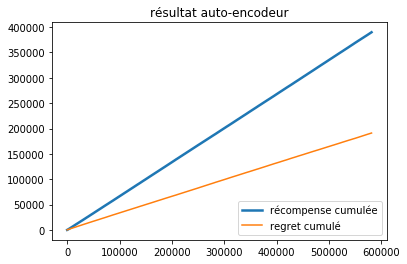

In [160]:
fig, ax = plt.subplots()
line1, = ax.plot( recomp.cumsum(), linewidth=2.5,
                 label='récompense cumulée')
line2, = ax.plot(regret.cumsum(),
                 label='regret cumulé')
ax.set_title('résultat auto-encodeur')

ax.legend(loc='lower right')
plt.show()